In [1]:
# # Data Visualization & Analysis for Regression (AIM-VEE / CM + EV)
# This notebook:
# - Loads CM features + target (EV / excitation energy)
# - Checks basic stats and ranges
# - Visualizes distributions
# - Computes correlations with the target
# - Runs PCA for structure


In [2]:

!pip install seaborn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Make plots look bit nicer
plt.style.use("default")
sns.set_theme(context="notebook", style="whitegrid")



#Load Data

DATA_DIR = "/Users/lohitakshbadarala/Desktop/AIM-VEE/data/vee_predictor/Data_CM"

X_path = os.path.join(DATA_DIR, "CM_train.npy")  # features
y_path = os.path.join(DATA_DIR, "EV_train.npy")  # target

X = np.load(X_path)   
y = np.load(y_path)   

print("X shape:", X.shape)
print("y shape:", y.shape)


y = y.reshape(-1)
print("y shape after reshape:", y.shape)


n_features_for_df = min(100, X.shape[1])  
df = pd.DataFrame(X[:, :n_features_for_df],
                  columns=[f"f_{i}" for i in range(n_features_for_df)])
df["target"] = y

df.head()



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
X shape: (6000000, 486)
y shape: (6000000,)
y shape after reshape: (6000000,)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,73.516695,29.116708,24.719788,42.858288,17.158454,19.627502,13.022778,11.380941,9.755522,10.12839,...,17.557013,12.695615,16.97092,14.067855,25.63176,36.858105,12.423901,14.845086,25.753235,22986.3
1,73.516695,29.116708,24.719788,42.858288,17.158454,19.627502,13.022778,11.380941,9.755522,10.12839,...,17.557013,12.695615,16.97092,14.067855,25.63176,36.858105,12.423901,14.845086,25.753235,27703.6
2,73.516695,29.116708,24.719788,42.858288,17.158454,19.627502,13.022778,11.380941,9.755522,10.12839,...,17.557013,12.695615,16.97092,14.067855,25.63176,36.858105,12.423901,14.845086,25.753235,41797.2
3,73.516695,29.116708,24.719788,42.858288,17.158454,19.627502,13.022778,11.380941,9.755522,10.12839,...,17.557013,12.695615,16.97092,14.067855,25.63176,36.858105,12.423901,14.845086,25.753235,51584.9
4,73.516695,29.116708,24.719788,42.858288,17.158454,19.627502,13.022778,11.380941,9.755522,10.12839,...,17.557013,12.695615,16.97092,14.067855,25.63176,36.858105,12.423901,14.845086,25.753235,52789.8



 Basic Feature Stats (first 100 features)


,count,mean,std,min,25%,50%,75%,max
f_0,6000000.0,71.276806,6.335183,53.358707,73.516695,73.516695,73.516695,73.516695
f_1,6000000.0,23.050585,9.633384,7.031254,14.027374,25.394432,28.793933,47.679443
f_2,6000000.0,26.138483,8.509001,7.122654,20.548139,24.693832,31.625061,53.233356
f_3,6000000.0,21.095498,11.199485,7.306014,12.666059,17.528467,24.727965,50.416262
f_4,6000000.0,19.299652,13.266335,1.781771,7.442201,17.244146,34.396306,50.022629
...,...,...,...,...,...,...,...,...
f_96,6000000.0,12.950357,13.951535,0.000000,1.308048,9.080678,16.660558,36.858105
f_97,6000000.0,9.561129,9.505211,0.000000,0.230361,8.103737,15.174986,30.738034
f_98,6000000.0,11.401063,11.350533,0.000000,0.500000,7.262213,23.978792,35.297493
f_99,6000000.0,7.997554,10.177013,0.000000,0.345147,1.878725,14.426510,35.848724



 Target Stats
min: -24900.4
max: 129174.4
mean: 54867.6370140667
std: 15365.505961002138


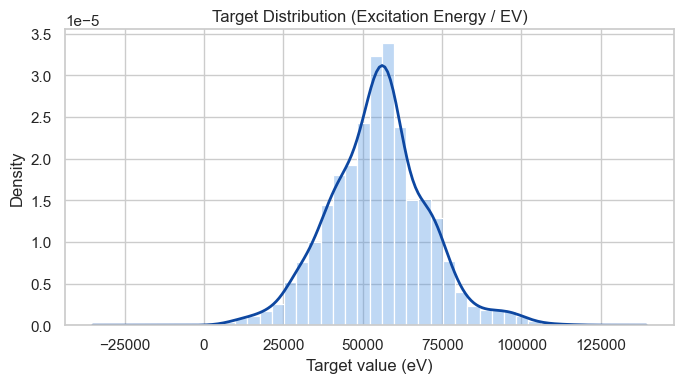

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Basic stats

print("\n Basic Feature Stats (first", n_features_for_df, "features)")
display(df.describe().T)

print("\n Target Stats")
print("min:", float(y.min()))
print("max:", float(y.max()))
print("mean:", float(y.mean()))
print("std:", float(y.std()))


# Target distribution


plt.figure(figsize=(7,4))

# Histogram (light)
sns.histplot(
    y,
    bins=40,
    stat="density",
    color="#4A90E2",      
    alpha=0.35,
    edgecolor=None
)

# KDE curve (smooth “bell curve”)
sns.kdeplot(
    y,
    color="#0D47A1",      # deep blue
    linewidth=2,
    bw_adjust=5  # smoothness adjustment
)

plt.title("Target Distribution (Excitation Energy / EV)")
plt.xlabel("Target value (eV)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


#NOTE: The min value -24900.45 seems like an outlier and is not possible. Consider investigating further or removing it if necessary.



Top 20 features most positively correlated with target:


target    1.000000
f_27      0.425523
f_26      0.371945
f_14      0.296513
f_42      0.257418
f_1       0.256045
f_13      0.252156
f_43      0.251223
f_56      0.227867
f_11      0.220507
f_9       0.219845
f_19      0.218249
f_8       0.213311
f_18      0.211410
f_2       0.179315
f_57      0.143268
f_10      0.138078
f_41      0.125013
f_28      0.102145
f_55      0.092120
Name: target, dtype: float64


Top 20 features most negatively correlated with target:


f_75   -0.331002
f_33   -0.332853
f_98   -0.336351
f_97   -0.339055
f_23   -0.344165
f_48   -0.353325
f_84   -0.359280
f_49   -0.370439
f_96   -0.376592
f_94   -0.378385
f_93   -0.401018
f_92   -0.405979
f_91   -0.407133
f_50   -0.418948
f_90   -0.419711
f_47   -0.431376
f_6    -0.432335
f_45   -0.432523
f_46   -0.451284
f_7    -0.486371
Name: target, dtype: float64

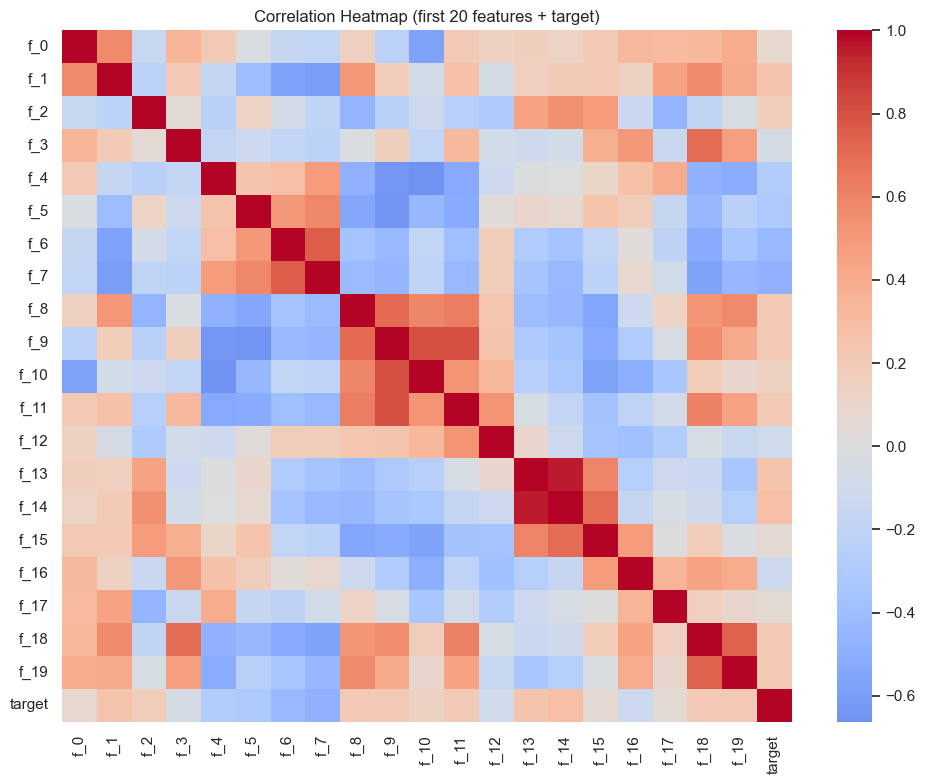

In [4]:
# Pearson correlations between each feature and the target hearmap

corr_with_target = df.corr()["target"].sort_values(ascending=False)
print("\nTop 20 features most positively correlated with target:")
display(corr_with_target.head(20))

print("\nTop 20 features most negatively correlated with target:")
display(corr_with_target.tail(20))

# Correlation heatmap for a small subset of features
subset_feats = [f"f_{i}" for i in range(min(20, n_features_for_df))] + ["target"]
corr_matrix = df[subset_feats].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (first 20 features + target)")
plt.tight_layout()
plt.show()


Explained variance ratio (first 10 components):
[0.42112882 0.15087926 0.0935849  0.07948883 0.05593943 0.02654025
 0.01056021 0.00811069 0.0062813  0.00569524]
Cumulative explained variance (first 10):
[0.42112882 0.57200808 0.66559298 0.74508181 0.80102124 0.82756149
 0.8381217  0.84623239 0.85251369 0.85820893]


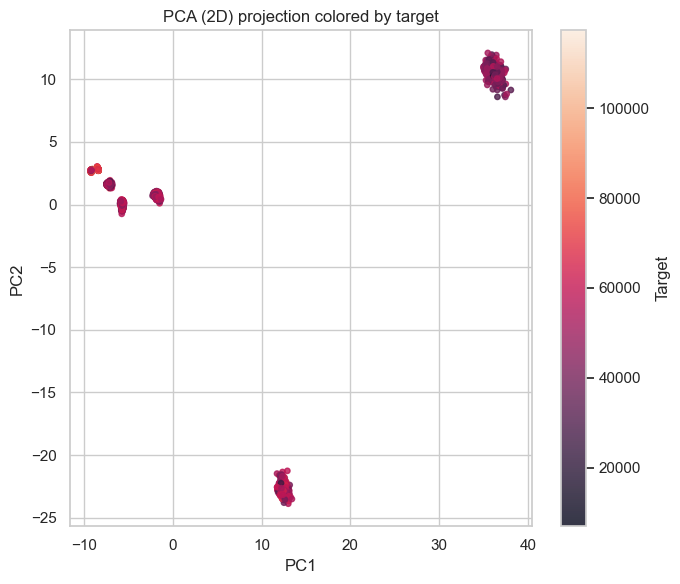

In [5]:
# PCA Analysis

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to see intrinsic dimensionality/structure
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (first 10 components):")
print(pca.explained_variance_ratio_[:10])
print("Cumulative explained variance (first 10):")
print(np.cumsum(pca.explained_variance_ratio_[:10]))

# 2D PCA scatter colored by target)
max_points = 3000
idx = np.random.choice(len(X_pca), size=min(max_points, len(X_pca)), replace=False)

plt.figure(figsize=(7,6))
sc = plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=y[idx], s=15, alpha=0.8)
plt.colorbar(sc, label="Target")
plt.title("PCA (2D) projection colored by target")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
